# Import data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from sklearn import datasets
import datetime as dt

import scikitplot as skplt

In [3]:
df = pd.read_csv("Data/data.csv")
column_names = list(df.columns)
df.drop("num", axis=1, inplace=True)

# General Python

In [4]:
age = 29
print(f"I am {age} years old")

I am 29 years old


In [1]:
?str.replace

In [ ]:
%matplotlib inline

In [3]:
a = 1
%who

a	 


In [6]:
test

,Nom,Somme
0,Bulbasaur,318
1,Ivysaur,405
2,Venusaur,525
3,VenusaurMega Venusaur,625
4,Charmander,309
5,Charmeleon,405
6,Charizard,534
7,CharizardMega Charizard X,634
8,CharizardMega Charizard Y,634
9,Squirtle,314


In [5]:
test.columns = ["Nom", "Somme"]

In [7]:
report_fields = ["PROV_WORK_ORDR_ID", "CUST_ID", "MACRO_SEG", "CUST_LEG_LANG_CD", "PRODUCT_FAMILY", "LAST_APPT_DT", "LAST_APPT_SLOT", "CONTACT_PHON_NUMBER"]

In [10]:
', '.join(report_fields)

'PROV_WORK_ORDR_ID, CUST_ID, MACRO_SEG, CUST_LEG_LANG_CD, PRODUCT_FAMILY, LAST_APPT_DT, LAST_APPT_SLOT, CONTACT_PHON_NUMBER'

In [17]:
language = 'fr'
if language not in ["fr", "nm", "de"]: 
    rais

In [18]:
assert language in ["fr", "ne", "de"]

In [4]:
%%time
import time
for _ in range(100):
    time.sleep(0.01)

CPU times: user 20.3 ms, sys: 10.3 ms, total: 30.6 ms
Wall time: 10.8 s


In [10]:
import pandas as pd
dic = {"a":[1,2], "b":[2,4]}
df = pd.DataFrame(data=dic)
df.head()

,a,b
0,1,2
1,2,4


In [5]:
df.max(axis=1)

0    2
1    4
dtype: int64

In [12]:
df = pd.melt(df, id_vars=["country","year"], value_name="cases", var_name="sex_and_age")
# Extract Sex, Age lower bound and Age upper bound group
tmp_df = df["sex_and_age"].str.extract("(\D)(\d+)(\d{2})")    

# Name columns
tmp_df.columns = ["sex", "age_lower", "age_upper"]

# Create `age`column based on `age_lower` and `age_upper`
tmp_df["age"] = tmp_df["age_lower"] + "-" + tmp_df["age_upper"]

# Merge 
df = pd.concat([df, tmp_df], axis=1)

# Drop unnecessary columns and rows
df = df.drop(['sex_and_age',"age_lower","age_upper"], axis=1)
df = df.dropna()
df = df.sort(ascending=True,columns=["country", "year", "sex", "age"])
df.head(10)

NameError: name 'df' is not defined

In [4]:
# Type hints
# Useful because Python is dynamicly typed

def double(n: int) -> int:
    return 2*n

double('yo')
help(double)

Help on function double in module __main__:

double(n:int) -> int



## Data types

In [6]:
a = {"a", "b", "c"}
b = {"a", "x"}
print(a | b)
print(a & b)
print(a - b)

{'c', 'b', 'x', 'a'}
{'a'}
{'c', 'b'}


In [9]:
l = ["a", "b"]
l.append(["c", "d"])
print(l)

['a', 'b', ['c', 'd']]


In [2]:
dic = {"name":"Ben", "age":15, "goal":"mas"}
dic.get("names", "hey")


'hey'

## Writing data in an Excel file

In [3]:
subset = df[["Name", "Type 1", "Total", "Generation", "Legendary"]].sample(10).copy()
subset

,Name,Type 1,Total,Generation,Legendary
734,Vivillon,Bug,411,6,False
328,Mawile,Steel,380,3,False
161,Dragonite,Dragon,600,1,False
598,Throh,Fighting,465,5,False
294,Lombre,Water,340,3,False
412,Metagross,Steel,600,3,False
164,MewtwoMega Mewtwo Y,Psychic,780,1,True
264,Suicune,Water,580,2,True
132,Scyther,Bug,500,1,False
214,Slowking,Water,490,2,False


In [18]:
from openpyxl import load_workbook

wb = load_workbook(filename = 'pok_test.xlsx')
ws = wb.active
print(ws)
print(ws.values)
df_xlsx = pd.DataFrame(ws.values)
df_xlsx

<Worksheet "Sheet1">
<generator object values at 0x7f7c720cbca8>


,0,1,2,3,4,5
0,Name,Type 1,Total,Gen,Legendary,Liked ?


In [21]:
from openpyxl.worksheet.datavalidation import DataValidation

# Create the workbook and worksheet we'll be working with
wb = load_workbook(filename = 'pok_test.xlsx')
ws = wb.active

# Create a data-validation object with list validation
dv = DataValidation(type="list", formula1='"Dog,Cat,Bat"', allow_blank=True)

# Optionally set a custom error message
dv.error ='Your entry is not in the list'
dv.errorTitle = 'Invalid Entry'

# Optionally set a custom prompt message
dv.prompt = 'Please select from the list'
dv.promptTitle = 'List Selection'

dv.add('G1:H5')
# Add the data-validation object to the worksheet
ws.add_data_validation(dv)

wb.save(filename = "pok_modified.xlsx")

In [13]:
len(subset.columns)

5

In [31]:
def as_text(value):
    if value is None:
        return ""
    return str(value)

In [69]:
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font
from openpyxl.utils  import get_column_letter
from openpyxl.formatting.rule import DataBar, FormatObject
from openpyxl.formatting.rule import Rule
from openpyxl.styles import Font, PatternFill, Border
from openpyxl.styles.differential import DifferentialStyle

# Create the workbook and worksheet we'll be working with
wb = Workbook()
ws = wb.active



for r in dataframe_to_rows(subset, index=False, header=True):
    ws.append(r)

# Bold headers
for col in range(1,len(subset.columns)+1):
    ws.cell(row=1, column=col).font=Font(bold=True,
                                        size=12)
# add leading 0 for phone numbers    
for row in range(2,len(subset)+1):
    ws.cell(row=row, column=3).number_format = '0000'

# Resize column width 
dims = {}
for row in ws.rows:
    for cell in row:
        if cell.value:
            dims[cell.column] = max((dims.get(cell.column, 0), len(str(cell.value))))   
            
for col, value in dims.items():
    print(value)
    ws.column_dimensions[get_column_letter(col)].width = value + 2
    
# Adding data bars visuals to waste_score
first = FormatObject(type='num',val=0)
second = FormatObject(type='num',val=1)
data_bar = DataBar(cfvo=[first, second], color="638EC6", showValue=True, minLength=None, maxLength=None)

r = Rule(type='dataBar', dataBar=data_bar)
ws.conditional_formatting.add("D1:D5", r)

# # Add conditional formating on appt_slot - not supported
# dxf = DifferentialStyle(font=Font(bold=True), fill=PatternFill(start_color='EE1111', end_color='EE1111'))
# rule = Rule(type='cellIs', dxf=dxf, formula=["6"])
# ws.conditional_formatting.add("D1:D10", rule)

# sort by appt_slot - impossible to sort via openpyxl, but can display the filters
ws.auto_filter.ref = "A1:E15"

wb.save(filename = "pok_with_data.xlsx")

19
8
5
10
9


AttributeError: module 'openpyxl.formatting' has no attribute 'CellIsRule'

In [47]:
dims.get(1,0)

19

# Functions

* DRY
* Do one thing 

In [91]:
def ideal_function_google_docstrings(a, b=2):
    """
    Description of the function to easily understand what it does without having to dive into the code (with imperative style)
    
    Args:
        a (string): description
        b (int, optional): description
        
    Returns:
        bool: description
        
    Raises:
        valueError: in case you have error handlers
        
    Note:
        to put a link to a paper describing the method you are implementing for example
    """
    pass

def ideal_function_numpydoc_docstrings(a, b=2):
    """
    Description of the function to easily understand what it does without having to dive into the code (with imperative style)
    
    Parameters:
    ------------
    a : string
        description
    b : int, optional
        description
        Default = 2
        
    Returns
    -------
    bool
        description
    """
    pass

In [92]:
print(ideal_function_google_docstrings.__doc__)


    Description of the function to easily understand what it does without having to dive into the code (with imperative style)
    
    Args:
        a (string): description
        b (int, optional): description
        
    Returns:
        bool: description
        
    Raises:
        valueError: in case you have error handlers
        
    Note:
        to put a link to a paper describing the method you are implementing for example
    


In [93]:
import inspect
print(inspect.getdoc(ideal_function_google_docstrings))

Description of the function to easily understand what it does without having to dive into the code (with imperative style)

Args:
    a (string): description
    b (int, optional): description
    
Returns:
    bool: description
    
Raises:
    valueError: in case you have error handlers
    
Note:
    to put a link to a paper describing the method you are implementing for example


In [95]:
# mutable object that are passed as argument to a function will be modified by the function
# Never assign a default value to mutable parameter passed to a function, use None insted

def foo(x):
    x[0] = 99
    return(x)

t = [1,2,3]
foo(t)
print(t)

def bar(x):
    x=x+3
    return(x)

b = 5
bar(b)
print(b)

[99, 2, 3]
5


## Context manager

In [96]:
with open("Data/data.csv") as file:
    text = file.read()
    length = len(text)

print(length)

44024


In [100]:
# creating your own context manager
import contextlib

@contextlib.contextmanager
def my_context():
    print("Hello")
    yield 
    print("Bye")
    
with my_context():
    print("I m Ben")

Hello
I m Ben
Bye


In [110]:
import os

@contextlib.contextmanager
def in_dir(path):
    old_dir = os.getcwd()
    os.chdir(path)
    try:
        yield 
    finally:
        os.chdir(old_dir)
    
with in_dir("Data/"):
    print(os.listdir())

['AirQualityUCI.csv', 'data.csv', 'iris.txt', 'diabetes.csv', 'mpg.txt', 'text.txt', 'character-predictions.csv', 'data.pkl.zip']


In [109]:
@contextlib.contextmanager
def timer():

    start = time.time()
    yield
    end = time.time()
    print('Elapsed: {:.2f}s'.format(end - start))

with timer():
    time.sleep(0.25)

Elapsed: 0.25s


In [ ]:
@contextlib.contextmanager
def database(url):
    db = postgres.connect(url)
    try:
        yield db
    finally: # to ensure we disconnect even if problems occur
        db.disconnect()

## Decorators

In [116]:
# functions are objects:

pt = print
pt("Hello")

list_of_fct = [print, sum, display]
pt(list_of_fct[1]([1,2,3]))

fct_dic = {"median": np.median,
          "mean" : np.mean,
          "std": np.std}
pt(fct_dic["mean"]([1,2,3]))

Hello
6
2.0


In [121]:
def has_doctring(func):
    """
    Check if the function func has a docstring
    """
    
    return(func.__doc__ is not None)

def a():
    pass

def b():
    "heu"
    pass

pt(has_doctring(a))
pt(has_doctring(b))

False
True


In [124]:
# closures -  contains a copy of nonlocal variables so that function can execute
# deleting x won't have an impact because it is still in the fct closure
def foo():
    a=5
    def bar():
        print(a)
    return(bar)

func = foo()
print(func())
print(func.__closure__[0].cell_contents)

5
None
5


In [128]:
def multiply(a,b):
    return(a*b)

def double_args(func):
    #define a new function that we can modify
    def wrapper(a,b):
        return(func(a*2,b*2))
    
    return(wrapper)

new_multiply = double_args(multiply) #equivalent to put @double_args before the function definition

print(new_multiply(1,5))

20


In [6]:
def more(func):
    def inner(*args, **kwargs):
        print("The function {} is working fine".format(func.__name__))
        print("----"*10)
        return(func(*args, **kwargs))
        print("----"*10)
    return(inner)

@more
def somme(a,b):
    return(a+b)


somme(5,8)

The function somme is working fine
----------------------------------------


13

Decorators are wrapper around a function to increase it's functionality

the @decorator is just a short way of saying:

new_fct = decorator(old_fct)

### Real examples

In [3]:
import time
from functools import wraps

def print_execution_time(fct):
    
    @wraps(fct) # allows to keep the metadata of the decorated function
    def wrapper(*args, **kwargs):
        print("Code has started")
        start_time = time.time()
        result = fct(*args, **kwargs) 
        print("{} function took {:.2e}s".format(fct.__name__, time.time() - start_time))
        return(result)
        
    return(wrapper)

@print_execution_time
def print_hello(num):
    """
    print hello num times
    """
    for i in range(num):
        print("hello")
        
print_hello(10)

Code has started
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
print_hello function took 3.04e-04s


In [156]:
print_hello.__wrapped__(5) # to call the function without the decoration

hello
hello
hello
hello
hello


In [154]:
print(print_hello.__name__)
print(print_hello.__doc__) 

print_hello

    print hello num times
    


In [142]:
def memoize(func):
    """
    Store the result of decorated function in a dictionary for fast lookup
    """
    
    cache = {}
    def wrapper(*args, **kwargs):
        if (args, kwargs) not in cache:
            cache[(args, kwargs)] = func(*args, **kwargs)
        return(cache[(args, kwargs)])

    return(wrapper)

@memoize
def slow_function(a,b):
    print("Sleeping")
    time.sleep(2)
    return(a+b)

slow_function(10,5)

TypeError: unhashable type: 'dict'

### Decorators with parameters

In [159]:
def run_n_times(n):
    def decorator(func):
        def wrapper(*args, **kwargs):
            for _ in range(n):
                func(*args, **kwargs)
        return(wrapper)
    return(decorator)

@run_n_times(3)
def pp(string):
    print("Hello " + string)
    
pp("Ben")

Hello Ben
Hello Ben
Hello Ben


In [7]:
import signal

def raise_timeout(*args, **kwargs):
    raise TimeoutError()
    
signal.signal(signalnum = signal.SIGALRM, handler=raise_timeout)

def timeout(n_seconds):
    
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            signal.alarm(n_seconds)
            try:
                return(func(*args, **kwargs))
            finally:
                signal.alarm(0) # to kill the alarm
        return(wrapper)
    return(decorator)

@timeout(3)
def foo():
    time.sleep(2)
    print("foo!")
    
foo()

foo!


## Generators & iterators

In [2]:
class MyIterator:

    def __init__(self):

        print("Je m'initialise à 40")
        self.i = 40

    def __iter__(self):

        print("On a appelé __iter__")
        return self

    def __next__(self):

        print("On a appelé __next__")
        self.i += 2
        if self.i > 56 :
            raise StopIteration()

        return self.i
    
for x in MyIterator():
    print(x)

Je m'initialise à 40
On a appelé __iter__
On a appelé __next__
42
On a appelé __next__
44
On a appelé __next__
46
On a appelé __next__
48
On a appelé __next__
50
On a appelé __next__
52
On a appelé __next__
54
On a appelé __next__
56
On a appelé __next__


In [1]:
def my_generator():

    i = 40

    while i <= 56:

        i += 2

        yield i
        
for x in my_generator():
    print(x)

42
44
46
48
50
52
54
56
58


L'intérêt des générateurs et de ne pas avoir à stocker un grand nombre de données dans une variable si on sait qu'on va encore filtrer par la suite

In [4]:
big_data = """Le sénateur, dont il a été parlé plus haut, était un homme entendu qui 
    avait fait son chemin avec une rectitude inattentive à toutes ces rencontres qui font 
    obstacle et qu'on nomme conscience, foi jurée, justice, devoir; il avait marché droit à 
    son but et sans broncher une seule fois dans la ligne de son avancement et de son intérêt. 
    C'était un ancien procureur, attendri par le succès, pas méchant homme du tout, rendant 
    tous les petits services qu'il pouvait à ses fils, à ses gendres, à ses parents, même à 
    des amis; ayant sagement pris de la vie les bons côtés, les bonnes occasions, les bonnes 
    aubaines. Le reste lui semblait assez bête. Il était spirituel, et juste assez lettré 
    pour se croire un disciple d'Epicure en n'étant peut-être qu'un produit de Pigault-Lebrun.
    [...]
    (Les Misérables, Victor Hugo)
    """

import re

def is_part_of_a_word(character):
    return len(re.findall('\w', character, flags = re.UNICODE))  

def get_words(text):
    print("Je commence à lire le texte maintenant")
    
    current_word = ""
    for character in text:
        if not is_part_of_a_word(character):
            if current_word != "":
                yield current_word
                current_word = ""
        else:
            current_word += character

def filter_by_size(words, min_size):
    return (w for w in words if len(w) >= min_size)

def filter_by_letters(words, char):
    return (w for w in words if char in w)
         
    
words = get_words(big_data)
words = filter_by_size(words, 6)
words = filter_by_letters(words, "a")
print("'words' est encore un générateur. Le texte n'a toujours pas été lu")
        
print("L'opération suivante va lancer la lecture du texte: ")
[w for w in words]

'words' est encore un générateur. Le texte n'a toujours pas été lu
L'opération suivante va lancer la lecture du texte: 
Je commence à lire le texte maintenant


['sénateur',
 'inattentive',
 'obstacle',
 'marché',
 'avancement',
 'ancien',
 'attendri',
 'méchant',
 'rendant',
 'pouvait',
 'parents',
 'sagement',
 'occasions',
 'aubaines',
 'semblait',
 'Pigault',
 'Misérables']

In [8]:
if datafile is None:
    print("nothing")

NameError: name 'datafile' is not defined

# Packages

## os

In [1]:
import os

In [2]:
os.getcwd()

'/work/jupyterhub/id860112/Playground'

In [67]:
os.chdir('../RWMI')
os.getcwd()

In [4]:
os.mkdir('testdir')
# os.makedirs('level1dir/level2dir')

os.rmdir('testdir')
# os.removedirs('level1dir/level2dir')

# os.rename('newDir','newDir2')

In [29]:
os.listdir()[:5]

['Iris.ipynb',
 '.ipynb_checkpoints',
 'mpg.ipynb',
 'NN.ipynb',
 'DC_suivi_Py.ipynb']

In [14]:
next(os.walk("/work/jupyterhub/id860112/"))

('/work/jupyterhub/id860112/',
 ['.ipynb_checkpoints',
  'envs',
  'pkgs',
  'Functions',
  'Playground',
  'Intervention_time',
  'PPA_2017-reduce-wasteful-prf-interventions',
  'rwpi',
  'RWMI',
  'Standardization'],
 ['useful conda commands.ipynb',
  'Clean_up_tmp_Spark_directory.ipynb',
  'Clean_up_your_Conda_disk_usage.ipynb',
  'Connection_to_oracle_DB.ipynb',
  'How_to_generate_Kerberos_ticket_using_Python_in_JupyterHub.ipynb',
  'packages_installation.ipynb',
  'PySpark_ connections.ipynb',
  'TeraData_query.ipynb',
  'Access_DL_MELT.ipynb',
  'papermill_test.ipynb',
  'make_datascience_structure_folders.sh',
  'freeze_requirements.ipynb'])

In [28]:
for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        if file.endswith(".csv"):
            print(file)
            list_states.append(pd.read_csv(root+'/'+file, index_col=None))

merge_data = pd.concat(list_states[0:])

AirQualityUCI.csv
data.csv
diabetes.csv
character-predictions.csv
heart.csv
heart_cleaned.csv
uli.csv
ESS1-8e01.csv
fleurs_complete.csv
sansmodif.csv
table.csv
breast_cancer_data.csv


In [66]:
globals()

{'In': ['',
  'import pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport numpy as np\nimport time\nfrom sklearn import datasets\n\nimport scikitplot as skplt',
  'import pyodbc\n\nquery = "SEL top 500 contact_phone_number FROM D0_BUS_EUDS_APPV.APP_PPADS_R_RWMI"\n\nwith pyodbc.connect(driver=\'Teradata\', dbcname=\'dwhp\', uid="id860112", pwd="Phynix_777") as conn:\n        conn.setdecoding(pyodbc.SQL_CHAR, encoding=\'CP1252\')\n        rawdata = pd.read_sql(query, conn) \n\nprint("Training Data has been imported successfully")\nprint(rawdata.shape)',
  'import pyodbc\n\nquery = "SEL top 500 contact_phon_number FROM D0_BUS_EUDS_APPV.APP_PPADS_R_RWMI"\n\nwith pyodbc.connect(driver=\'Teradata\', dbcname=\'dwhp\', uid="id860112", pwd="Phynix_777") as conn:\n        conn.setdecoding(pyodbc.SQL_CHAR, encoding=\'CP1252\')\n        rawdata = pd.read_sql(query, conn) \n\nprint("Training Data has been imported successfully")\nprint(rawdata.shape)',
  'rawdata.head()',
 

## Dates and times

In [1]:
import datetime as dt

In [2]:
print(dt.datetime(1990,3,30))
print(dt.datetime(1990,3,30,3,25))

1990-03-30 00:00:00
1990-03-30 03:25:00


In [12]:
date_str = "25/03/2018 8:12"
date = dt.datetime.strptime(date_str, "%d/%m/%Y %H:%M") # parse date
print(date)
print(dt.datetime.strptime("March 30, 1990", "%B %d, %Y"))

2018-03-25 08:12:00
1990-03-30 00:00:00


In [19]:
print(date.strftime("%A %d %B, %Y - %-I:%M %p")) # format date
print(date.time()) # only keep time component
print(date.day)

Sunday 25 March, 2018 - 8:12 AM
08:12:00
25


In [20]:
time = dt.time(8,10,25)
print(time.minute)

10


In [21]:
date.time() < time

False

## Numpy

In [ ]:
indices = np.argsort(taxi[:,15])
taxi_sorted = taxi[indices]

In [3]:
ones = [ [1,1,1],
       [1,1,1]]
zeros = [0,0,0]

zeros_2d = np.expand_dims(zeros,axis=0)
print(zeros_2d)
print(zeros_2d.shape)
print()
print('\n')
combined = np.concatenate([ones,zeros_2d],axis=0)
print(combined)

[[0 0 0]]
(1, 3)



[[1 1 1]
 [1 1 1]
 [0 0 0]]


In [151]:
arr = np.array([1,2,3,4,5,6])

print(arr.reshape(1,6))
print(arr.reshape(6,1))
print(arr.reshape(3,2))
print(arr.reshape(-1,1))

[[1 2 3 4 5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


## Stats

In [1]:
from scipy.stats import norm

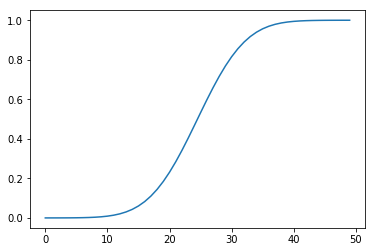

In [8]:
x = np.linspace(-4,4)
y = norm(0,1).cdf(x)

plt.plot(y)
plt.show()

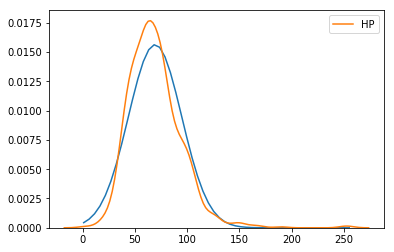

In [30]:
hp = df.HP

mean = hp.mean()
std = hp.std()

x = np.linspace(hp.min(), hp.max())
y = norm(mean, std).pdf(x)

plt.plot(x,y)
sns.kdeplot(hp)

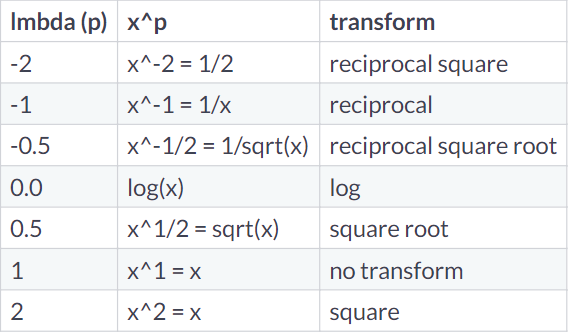

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3)

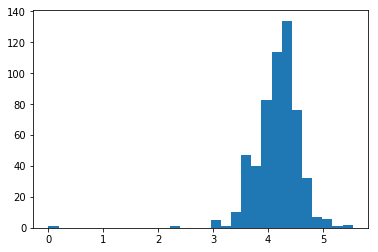

In [14]:
from scipy.stats import boxcox

plt.hist(boxcox(train["HP"], 0), bins=30);

## Statsmodels

In [8]:
from statsmodels.stats.proportion import proportions_ztest


count = np.array([98, 30])
nobs = np.array([500, 200])
stat, pvalue = proportions_ztest(count, nobs, alternative="larger")

if pvalue > 0.05:
    print("pvalue = {:.3f} -> We cannot reject the Null hypothesis that p1 = p2".format(pvalue))
else:
    print("pvalue = {:.3f} -> There is enough evidence to reject the Null hypothesis in favor of the alternative".format(pvalue))

pvalue = 0.077 -> We cannot reject the Null hypothesis that p1 = p2


## Pickle

In [34]:
import joblib
from sklearn import datasets, model_selection, neighbors

diabetes = datasets.load_diabetes()

X_train, X_test, y_train, y_test = model_selection.train_test_split(diabetes.data, diabetes.target, test_size = 0.25, random_state = 42)

knn = neighbors.KNeighborsRegressor().fit(X_train, y_train)

joblib.dump(knn, "knn_model.pkl")

['knn_model.pkl']

In [38]:
joblib.load("knn_model.pkl")

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [35]:
df.to_pickle("Data/data.pkl.zip")

In [36]:
df2 = pd.read_pickle("Data/data.pkl.zip")

## Cookiecutter

In [42]:
from cookiecutter.main import cookiecutter

cookiecutter(template="https://github.com/drivendata/cookiecutter-data-science")

CalledProcessError: Command '['git', 'clone', 'https://github.com/drivendata/cookiecutter-data-science']' returned non-zero exit status 128

## Papermill

In [67]:
import papermill as pm

params = ["name", "age"]
values = ["Ben", 29]

param_dic = dict(zip(params, values))

pm.execute_notebook('papermill_test.ipynb', "papermill_test.ipynb",
    kernel_name = "Python 3.5",
    parameters = param_dic)

Input Notebook:  papermill_test.ipynb
Output Notebook: papermill_test.ipynb


FileNotFoundError: [Errno 2] No such file or directory: 'papermill_test.ipynb'

In [58]:
dict(zip(keys, vals))

{'hyperparameters': {'max_depth': 3, 'n_estimators': 100},
 'model_name': 'RandomForestRegressor',
 'model_type': 'ensemble'}

In [62]:
from importlib import import_module
# from typing import Optional, Dict

def get_model(model_type, model_name, hyperparameters=None):
    model = getattr(import_module("sklearn." + model_type), model_name)
    return model(**hyperparameters) if hyperparameters else model()

model_type = "ensemble"
model_name = "RandomForestRegressor"
hyperparameters = {"max_depth":3, "n_estimators":100}
keys = ["model_type", "model_name", "hyperparameters"]
vals = [model_type, model_name, hyperparameters]

model = get_model(**dict(zip(keys, vals)))

ImportError: cannot import name '_get_n_jobs'

## pyodbc

In [42]:
import pyodbc

query = "SEL top 500 contact_phon_number FROM D0_BUS_EUDS_APPV.APP_PPADS_R_RWMI"

with pyodbc.connect(driver='Teradata', dbcname='dwhp', uid="id860112", pwd="***") as conn:
        conn.setdecoding(pyodbc.SQL_CHAR, encoding='CP1252')
        rawdata = pd.read_sql(query, conn) 

print("Training Data has been imported successfully")
print(rawdata.shape)

Training Data has been imported successfully
(500, 1)


# Efficient code

## Foundation

In [7]:
print(list(range(11)))
print(list(range(2,11,2)))
print([*range(1,12,2)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 4, 6, 8, 10]
[1, 3, 5, 7, 9, 11]


In [8]:
print(*enumerate(["a", "b", "c"], start = 5))


(5, 'a') (6, 'b') (7, 'c')


In [9]:
list(map(lambda x: x*2, range(5)))

[0, 2, 4, 6, 8]

* Use numpy arrays instead of list (faster because contains only 1 data type)
* they also use broadcasting for computations
* they have better indexing scheme for multidimentional [0,0] instead of [0][0]
* they allow slicing like [:,2]

## Timing and profiling

In [18]:
%%timeit 

np.random.rand(100)

2.14 µs ± 40.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [19]:
%timeit np.random.rand(100)

2.22 µs ± 311 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
times = %timeit -o np.random.rand(100)

print(times.timings)
print(times.best)
print(times.worst)

2.1 µs ± 19.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
[2.073507378809154e-06, 2.0763688487932085e-06, 2.1162284398451446e-06, 2.1287747705355285e-06, 2.1114376420155166e-06, 2.113295430317521e-06, 2.107888269238174e-06]
2.073507378809154e-06
2.1287747705355285e-06


In [25]:
%timeit -r5 -n1000 np.random.rand(100)

2.41 µs ± 473 ns per loop (mean ± std. dev. of 5 runs, 1000 loops each)


In [26]:
import time

start = time.time()
np.random.rand(100)
end = time.time()

print("Elapsed time = {}".format(end-start))

Elapsed time = 0.00014138221740722656


In [31]:
import sys

sys.getsizeof(np.random.rand(100))

896

## gaining efficiency

### zip, collections and itertools

In [37]:
[*zip(df["Name"].head(), df["HP"].head())]

[('Bulbasaur', 45),
 ('Ivysaur', 60),
 ('Venusaur', 80),
 ('VenusaurMega Venusaur', 80),
 ('Charmander', 39)]

In [38]:
from collections import Counter

Counter(df["Type 1"])

Counter({'Bug': 69,
         'Dark': 31,
         'Dragon': 32,
         'Electric': 44,
         'Fairy': 17,
         'Fighting': 27,
         'Fire': 52,
         'Flying': 4,
         'Ghost': 32,
         'Grass': 70,
         'Ground': 32,
         'Ice': 24,
         'Normal': 98,
         'Poison': 28,
         'Psychic': 57,
         'Rock': 44,
         'Steel': 27,
         'Water': 112})

In [51]:
from itertools import product, permutations, combinations, combinations_with_replacement

colors = ["Red", "Blue", "Green"]
values = [1,2,3]

print("permutations = ", [*permutations(colors)], "\n")
print("combinations = ", [*combinations(colors, 2)], "\n")
print("combinations_with_replacement = ", [*combinations_with_replacement(colors, 2)], "\n")
print("product = ", [*product(colors, values)], "\n")

permutations =  [('Red', 'Blue', 'Green'), ('Red', 'Green', 'Blue'), ('Blue', 'Red', 'Green'), ('Blue', 'Green', 'Red'), ('Green', 'Red', 'Blue'), ('Green', 'Blue', 'Red')] 

combinations =  [('Red', 'Blue'), ('Red', 'Green'), ('Blue', 'Green')] 

combinations_with_replacement =  [('Red', 'Red'), ('Red', 'Blue'), ('Red', 'Green'), ('Blue', 'Blue'), ('Blue', 'Green'), ('Green', 'Green')] 

product =  [('Red', 1), ('Red', 2), ('Red', 3), ('Blue', 1), ('Blue', 2), ('Blue', 3), ('Green', 1), ('Green', 2), ('Green', 3)] 



In [58]:
type1 = set(df["Type 1"].sample(10))
type2 = set(df["Type 1"].sample(10))

print(type1)
print(type2)

print("intersection = {} \n".format(type1.intersection(type2)))
print("difference = {} \n".format(type1.difference(type2)))
print("union = {} \n".format(type1.union(type2)))
print("symmetric difference = {} \n".format(type1.symmetric_difference(type2)))

{'Ground', 'Psychic', 'Bug', 'Rock', 'Normal'}
{'Grass', 'Normal', 'Fire', 'Water', 'Electric', 'Rock', 'Ghost', 'Dark'}
intersection = {'Normal', 'Rock'} 

difference = {'Ground', 'Psychic', 'Bug'} 

union = {'Normal', 'Grass', 'Fire', 'Bug', 'Dark', 'Ground', 'Psychic', 'Water', 'Rock', 'Ghost', 'Electric'} 

symmetric difference = {'Grass', 'Fire', 'Bug', 'Water', 'Electric', 'Ground', 'Psychic', 'Ghost', 'Dark'} 



### pandas efficiency

In [77]:
for i, row in df.head(3).iterrows():
    print(row)

Name          Bulbasaur
Type 1            Grass
Type 2           Poison
Total               318
HP                   45
Attack               49
Defense              49
Sp. Atk              65
Sp. Def              65
Speed                45
Generation            1
Legendary         False
Name: 0, dtype: object
Name          Ivysaur
Type 1          Grass
Type 2         Poison
Total             405
HP                 60
Attack             62
Defense            63
Sp. Atk            80
Sp. Def            80
Speed              60
Generation          1
Legendary       False
Name: 1, dtype: object
Name          Venusaur
Type 1           Grass
Type 2          Poison
Total              525
HP                  80
Attack              82
Defense             83
Sp. Atk            100
Sp. Def            100
Speed               80
Generation           1
Legendary        False
Name: 2, dtype: object


In [81]:
for row_named in df.head(3).itertuples(): # much faster than iterrows
    print(row_named)
    print(row_named.Name)

Pandas(Index=0, Name='Bulbasaur', _2='Grass', _3='Poison', Total=318, HP=45, Attack=49, Defense=49, _8=65, _9=65, Speed=45, Generation=1, Legendary=False)
Bulbasaur
Pandas(Index=1, Name='Ivysaur', _2='Grass', _3='Poison', Total=405, HP=60, Attack=62, Defense=63, _8=80, _9=80, Speed=60, Generation=1, Legendary=False)
Ivysaur
Pandas(Index=2, Name='Venusaur', _2='Grass', _3='Poison', Total=525, HP=80, Attack=82, Defense=83, _8=100, _9=100, Speed=80, Generation=1, Legendary=False)
Venusaur


In [85]:
df.apply(lambda row: row["Attack"] + row["Defense"], axis=1).head()

0     98
1    125
2    165
3    223
4     95
dtype: int64

Use .values to speed up computations by factor 10 ! -> it uses the power of numpy

In [87]:
%%timeit

df["Attack"] - df["Defense"]

336 µs ± 20.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [88]:
%%timeit

df["Attack"].values - df["Defense"].values

32 µs ± 5.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Conclusion: with pandas fastests ways to do computations:
* using .values
* using itertuples
* using apply

## Paraller computing

In [70]:
import time
def sleep(duration):
    time.sleep(duration)
    
    
from multiprocessing import Pool
from itertools import repeat

def split_tasks(n_workers, n_tasks, task_duration):
    start = time.time()
    Pool(n_workers).map(sleep, repeat(task_duration, n_tasks))
    end = time.time()
    print("Workers:", n_workers, "Tasks:", n_tasks, "Seconds:", round(end-start))

In [71]:
split_tasks(1, 4, 2)

Workers: 1 Tasks: 4 Seconds: 8


In [72]:
split_tasks(4,4,2)

Workers: 4 Tasks: 4 Seconds: 2


# Text data

In [21]:
text = [
    "Hello my name is Ben 29, I'm glad to meet you :- tell me what's up with you",
    "Oh oh oh I don't know what to write, but I keep on going as I need a few entries.",
    "That's crappy 88 ;:! i know but & it's for the need ++"
]

text_df = pd.DataFrame(text)
text_df.columns = ["text"]

text_df["name"] = ["Ben", "Karl", "Cyrine"]

In [24]:
text_df["cleaned_text"] = text_df["text"].str.replace('[^a-zA-Z0-9]', ' ').str.lower()
text_df

,text,name,cleaned_text
0,"Hello my name is Ben 29, I'm glad to meet you ...",Ben,hello my name is ben 29 i m glad to meet you ...
1,"Oh oh oh I don't know what to write, but I kee...",Karl,oh oh oh i don t know what to write but i kee...
2,That's crappy 88 ;:! i know but & it's for the...,Cyrine,that s crappy 88 i know but it s for the...


In [27]:
text_df["char_cnt"] = text_df["cleaned_text"].str.len()
text_df["word_cnt"] = text_df["cleaned_text"].str.split().str.len()
text_df["avg_word_len"] = text_df["char_cnt"] / text_df["word_cnt"]
text_df

,text,name,cleaned_text,char_cnt,word_cnt,avg_word_len
0,"Hello my name is Ben 29, I'm glad to meet you ...",Ben,hello my name is ben 29 i m glad to meet you ...,75,19,3.947368
1,"Oh oh oh I don't know what to write, but I kee...",Karl,oh oh oh i don t know what to write but i kee...,81,21,3.857143
2,That's crappy 88 ;:! i know but & it's for the...,Cyrine,that s crappy 88 i know but it s for the...,54,12,4.500000


In [40]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df = 0.1, max_df = 0.9)

text_cv = cv.fit_transform(text_df["cleaned_text"])

print(text_cv.toarray())
print(cv.get_feature_names())

cv_df = pd.DataFrame(text_cv.toarray(), columns = cv.get_feature_names()).add_prefix("count_")

results = pd.concat([text_df, cv_df], axis=1, sort=False)
results

[[1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 2]
 [0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 3 1 0 0 0 1 0 1 0 1 0]
 [0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0]]
['29', '88', 'as', 'ben', 'but', 'crappy', 'don', 'entries', 'few', 'for', 'glad', 'going', 'hello', 'is', 'it', 'keep', 'know', 'me', 'meet', 'my', 'name', 'need', 'oh', 'on', 'tell', 'that', 'the', 'to', 'up', 'what', 'with', 'write', 'you']


,text,name,cleaned_text,char_cnt,word_cnt,avg_word_len,count_29,count_88,count_as,count_ben,...,count_on,count_tell,count_that,count_the,count_to,count_up,count_what,count_with,count_write,count_you
0,"Hello my name is Ben 29, I'm glad to meet you ...",Ben,hello my name is ben 29 i m glad to meet you ...,75,19,3.947368,1,0,0,1,...,0,1,0,0,1,1,1,1,0,2
1,"Oh oh oh I don't know what to write, but I kee...",Karl,oh oh oh i don t know what to write but i kee...,81,21,3.857143,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,That's crappy 88 ;:! i know but & it's for the...,Cyrine,that s crappy 88 i know but it s for the...,54,12,4.500000,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 20 
                        , stop_words = "english"
                       , ngram_range = (1,3)) #1gram, 2grams and 3 grams included

text_tfidf = tfidf.fit_transform(text_df["cleaned_text"])

print(text_tfidf.toarray())
print(tfidf.get_feature_names())

tfidf_df = pd.DataFrame(text_tfidf.toarray(), columns = tfidf.get_feature_names()).add_prefix("TFIDF_")

results = pd.concat([text_df, tfidf_df], axis=1, sort=False)

tfidf_df.iloc[0].sort_values(ascending=False)

[[0.37796447 0.37796447 0.37796447 0.37796447 0.         0.
  0.         0.         0.37796447 0.37796447 0.         0.
  0.         0.         0.         0.         0.         0.
  0.37796447 0.        ]
 [0.         0.         0.         0.         0.16156989 0.
  0.21244499 0.21244499 0.         0.         0.16156989 0.21244499
  0.63733497 0.21244499 0.21244499 0.42488998 0.21244499 0.21244499
  0.         0.21244499]
 [0.         0.         0.         0.         0.51785612 0.68091856
  0.         0.         0.         0.         0.51785612 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]]
['29', 'hello', 'hello ben', 'hello ben 29', 'know', 'know need', 'know write', 'know write going', 'meet', 'meet tell', 'need', 'need entries', 'oh', 'oh don', 'oh don know', 'oh oh', 'oh oh don', 'oh oh oh', 'tell', 'write']


TFIDF_meet tell           0.377964
TFIDF_tell                0.377964
TFIDF_hello               0.377964
TFIDF_hello ben           0.377964
TFIDF_hello ben 29        0.377964
TFIDF_meet                0.377964
TFIDF_29                  0.377964
TFIDF_oh                  0.000000
TFIDF_need entries        0.000000
TFIDF_need                0.000000
TFIDF_oh don              0.000000
TFIDF_oh don know         0.000000
TFIDF_know write going    0.000000
TFIDF_know write          0.000000
TFIDF_know need           0.000000
TFIDF_know                0.000000
TFIDF_oh oh               0.000000
TFIDF_oh oh don           0.000000
TFIDF_oh oh oh            0.000000
TFIDF_write               0.000000
Name: 0, dtype: float64

# Object Oriented

* No private/public like in java or c++
* all methods should have "self" as first argument
* __init__ method is the constructor
* __ dict __ contains a list of all attributes of an object

## Classes

In [13]:
class Dinosaur:
    pass

a = Dinosaur()
a

In [8]:
from abc import ABCMeta, abstractmethod

class character(object):
    """
    Character for MMORPG
    """
    # static attribute
    legs = 2
    
    __metaclass__ = ABCMeta
    
    def __init__(self, name, age, hp, status = "alive"):
        self.name = name
        self.age = age
        self.hp = hp
        self.status = status
        
    def birthday(self):
        print("Happy Birthday {}. You turned {} years old".format(self.name, self.age))
        self.age = self.age + 1
        
    def die(self):
        print("{} is dead on {}".format(self.name, dt.datetime.today()))
        self.status = "dead"
        
    def display_status(self):
        print("{} has {} HP".format(self.name, self.hp))
        
    @abstractmethod    
    def attack(self):
        pass
        
        
Ben = character("Benoît", 29, 100)
Ben.birthday()
Ben.die()

Ben.status

Happy Birthday Benoît. You turned 29 years old
Benoît is dead on 2020-02-18 17:06:34.550624


'dead'

In [228]:
class wizard(character):
    
    def __init__(self, name, age, hp, mp):
        character.__init__(self, name, age, hp)
        self.mp = mp
        
        
    def attack(self):
        self.get_mp()
        print("{} send a fire ball".format(self.name))
        self.mp = self.mp - 5
        self.get_mp()
        
    def get_mp(self):
        print("{} has {}/50 MP".format(self.name, self.mp))
        
    def get_hit(self, damage):
        self.hp = self.hp - damage
        if self.hp <= 0:
            self.die()
        else:
            print("{} has been hit, he lost {}. His current HP are {}".format(self.name, damage, self.hp))
    
    def display_status(self):
        character.display_status(self)
        print("{} has {} MP".format(self.name, self.mp))
        
za = wizard("zu", 25, 60, 50)
za.attack()
za.get_hit(10)
za.display_status()
za.get_hit(30)
za.get_hit(40)

zu has 50/50 MP
zu send a fire ball
zu has 45/50 MP
zu has been hit, he lost 10. His current HP are 50
zu has 50 HP
zu has 45 MP
zu has been hit, he lost 30. His current HP are 20
zu is dead on 2019-04-30 15:23:27.451375


In [1]:
class SuperList():
    """
    A Python list with some extras!
    functionw with __...__ are called dunder methods
    """
    
    def __init__(self, initial_state=[]):
        self._data = initial_state # use prefix _ to tell users that this attribute is for internal use
        self._update()
        
    def __repr__(self): # to overwrite default behaviour of print function
        string_representation = str(self._data)
        return string_representation
    
    def __eq__(self, other): # to overwrite default behaviour of == operator
        is_equal = self.__dict__ == other.__dict__
        return is_equal
    
    def _calc_length(self):
        l = 0
        for x in self._data:
            l += 1
        self.length = l
        
    def _calc_max(self):
        # max() will fail if our list is empty
        is_empty = self.length == 0
        # max() will fail if our list contains more
        # that one type of object:
        types = []
        for i in self._data:
            i_type = type(i)
            if i_type not in types:
                types.append(i_type)
        more_than_one_type = len(types) > 1

        # check both conditions and return either the
        # max or None
        if is_empty or more_than_one_type:
            self.max = None
        else:
            self.max = max(self._data)

    
    def _calc_min(self):
        # min() will fail if our list is empty
        is_empty = self.length == 0

        types = []
        for i in self._data:
            i_type = type(i)
            if i_type not in types:
                types.append(i_type)
        more_than_one_type = len(types) > 1

        # check both conditions and return either the
        # max or None
        if is_empty or more_than_one_type:
            self.min = None
        else:
            self.min = min(self._data)
    
    def _calc_types(self):
        types = []
        for item in self._data:
            item_type = type(item)
            if item_type not in types:
                types.append(item_type)
        self.types = types
    
    def _update(self):
        self._calc_length()
        self._calc_max()
        self._calc_min()
        self._calc_types()
        
    def append(self, new):
        self._data = self._data + [new]
        self._update()
        
    def reverse(self):
        self._data = self._data[::-1]
        self._update()
        
    def info(self):
        template = '''\
List Length:     {}
Max Value:       {}
Min Value:       {}
Types Contained: {}'''.format(self.length, self.max, self.min, self.types)
        print(template)
    
    
a = SuperList([1,2,3,4,5])
a.info()

b= SuperList([1.3,-14, "hello"])
b.info()



List Length:     5
Max Value:       5
Min Value:       1
Types Contained: [<class 'int'>]
List Length:     3
Max Value:       None
Min Value:       None
Types Contained: [<class 'float'>, <class 'int'>, <class 'str'>]


In [42]:
class DataShell():
    
    family = "DataShell" # class variable (shared among all objects)
    
    def __init__(self, name):
        self.filename = name
        self.data = pd.read_csv(name)
        self.stats = self.data.describe()
        
    def generate_csv(self):
        self.data_as_csv = pd.read_csv(self.filename)
        return self.data_as_csv
    
    def rename_column(self, column_name, new_column_name):
        self.data.columns = self.data.columns.str.replace(column_name, new_column_name)
    
        
df = DataShell("Data/data.csv")
df.filename
df.rename_column("num", "pokedex_id")
df.stats

,num,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [36]:
class StdDataShell(DataShell):
    # inherits all attributes and methods from DataShell
    
    def get_std(self, column):
        print("std of column {} is {:.2f}".format(column, self.data[column].std()))
#         return(self.data[column].std())


truc = StdDataShell("Data/data.csv")
truc.get_std("HP")

std of column HP is 25.53


### Inheritance & polymorphisme

In [30]:
# Create a class Vertebrate
class Vertebrate:
    spinal_cord = True
    def __init__(self, name):
        self.name = name

# Create a class Mammal, which inherits from Vertebrate
class Mammal(Vertebrate):
    def __init__(self, name, animal_type):
        self.animal_type = animal_type
        self.temperature_regulation = True

# Create a class Reptile, which also inherits from Vertebrate
class Reptile(Vertebrate):
    def __init__(self, name, animal_type):
        self.animal_type = animal_type
        self.temperature_regulation = False

# Instantiate a mammal with name 'Daisy' and animal_type 'dog': daisy
daisy = Mammal('Daisy', 'dog')

# Instantiate a reptile with name 'Stella' and animal_type 'alligator': stella
stella = Reptile('Stella', 'alligator')

# Print stella's attributes spinal_cord and temperature_regulation
print("Stella Spinal cord: " + str(stella.spinal_cord))
print("Stella temperature regulation: " + str(stella.temperature_regulation))

# Print daisy's attributes spinal_cord and temperature_regulation
print("Daisy Spinal cord: " + str(daisy.spinal_cord))
print("Daisy temperature regulation: " + str(daisy.temperature_regulation))

Stella Spinal cord: True
Stella temperature regulation: False
Daisy Spinal cord: True
Daisy temperature regulation: True


### Special methods

In [7]:
class Hack:
    def __len__(self):
        print("hey hey")
        return(5)
    def __repr__(self):
        return "Je suis un éléphant très spécial"
    
a = Hack()
print(len(a))
print(a)

hey hey
5
Je suis un éléphant très spécial


# Widgets

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display

In [4]:
w = widgets.IntSlider()
display(w)
print(w.value)
print(w.keys)
w.max = 250

IntSlider(value=0)

0
['style', '_dom_classes', 'max', '_model_module_version', '_model_name', 'disabled', 'readout', 'value', 'continuous_update', 'readout_format', '_view_name', 'description_tooltip', '_model_module', 'min', '_view_module', 'orientation', 'description', 'layout', '_view_module_version', '_view_count', 'step']


In [5]:
widgets.Text(value='Hello World!', disabled=True)

Text(value='Hello World!', disabled=True)

## Control list

In [13]:
a = widgets.FloatText()
b = widgets.FloatSlider()
display(a,b)

mylink = widgets.jslink((a, 'value'), (b, 'value'))

FloatText(value=0.0)

FloatSlider(value=0.0)

FloatText(value=0.0)


In [11]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)


IntSlider(value=7, continuous_update=False, description='Test:', max=10)

In [53]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, orientation='vertical', readout…

In [54]:
widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.2, # exponent step
    description='Log Slider'
)

FloatLogSlider(value=10.0, description='Log Slider', max=10.0, min=-10.0, step=0.2)

In [55]:
widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

IntRangeSlider(value=(5, 7), continuous_update=False, description='Test:', max=10)

In [57]:
widgets.IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)


widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
)

FloatProgress(value=7.5, bar_style='info', description='Loading:', max=10.0)

In [61]:
widgets.BoundedIntText(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Text:',
    disabled=False
)

widgets.BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Text:',
    disabled=False
)

BoundedFloatText(value=7.5, description='Text:', max=10.0, step=0.1)

In [62]:
widgets.IntText(
    value=7,
    description='Any:',
    disabled=False
)
widgets.FloatText(
    value=7.5,
    description='Any:',
    disabled=False
)

FloatText(value=7.5, description='Any:')

In [63]:

widgets.ToggleButton(
    value=False,
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='check'
)

ToggleButton(value=False, description='Click me', icon='check', tooltip='Description')

In [64]:

widgets.Checkbox(
    value=False,
    description='Check me',
    disabled=False
)

Checkbox(value=False, description='Check me')

In [65]:
widgets.Valid(
    value=False,
    description='Valid!',
)

Valid(value=False, description='Valid!')

In [66]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=False,
)

Dropdown(description='Number:', index=1, options=('1', '2', '3'), value='2')

In [67]:
widgets.RadioButtons(
    options=['pepperoni', 'pineapple', 'anchovies'],
#     value='pineapple',
    description='Pizza topping:',
    disabled=False
)

RadioButtons(description='Pizza topping:', options=('pepperoni', 'pineapple', 'anchovies'), value='pepperoni')

In [68]:
widgets.Select(
    options=['Linux', 'Windows', 'OSX'],
    value='OSX',
    # rows=10,
    description='OS:',
    disabled=False
)

Select(description='OS:', index=2, options=('Linux', 'Windows', 'OSX'), value='OSX')

In [69]:
widgets.SelectionSlider(
    options=['scrambled', 'sunny side up', 'poached', 'over easy'],
    value='sunny side up',
    description='I like my eggs ...',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

SelectionSlider(continuous_update=False, description='I like my eggs ...', index=1, options=('scrambled', 'sun…

In [70]:

widgets.ToggleButtons(
    options=['Slow', 'Regular', 'Fast'],
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('Slow', 'Regular', 'Fast'), tooltips=('Description of slow', 'Des…

In [71]:
widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

SelectMultiple(description='Fruits', index=(1,), options=('Apples', 'Oranges', 'Pears'), value=('Oranges',))

In [72]:
widgets.Text(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Text(value='Hello World', description='String:', placeholder='Type something')

In [73]:
widgets.Textarea(
    value='Hello World',
    placeholder='Type something',
    description='String:',
    disabled=False
)

Textarea(value='Hello World', description='String:', placeholder='Type something')

In [74]:

widgets.HBox([widgets.Label(value="The $m$ in $E=mc^2$:"), widgets.FloatSlider()])

In [75]:
widgets.HTMLMath(
    value=r"Some math and <i>HTML</i>: \(x^2\) and $$\frac{x+1}{x-1}$$",
    placeholder='Some HTML',
    description='Some HTML',
)

HTMLMath(value='Some math and <i>HTML</i>: \\(x^2\\) and $$\\frac{x+1}{x-1}$$', description='Some HTML', place…

In [76]:

widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

Button(description='Click me', icon='check', style=ButtonStyle(), tooltip='Click me')

In [77]:
play = widgets.Play(
#     interval=10,
    value=50,
    min=0,
    max=100,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

In [78]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

DatePicker(value=None, description='Pick a Date')

In [79]:

widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

ColorPicker(value='blue', description='Pick a color')

In [80]:
tab_contents = ['P0', 'P1', 'P2', 'P3', 'P4']
children = [widgets.Text(description=name) for name in tab_contents]
tab = widgets.Tab()
tab.children = children
for i in range(len(children)):
    tab.set_title(i, str(i))
tab

## Examples

In [19]:
def normal_density(x,a,mu,sigma):
    r=a*np.exp(-(x-mu)**2/(2*sigma**2))
    return (r)

In [20]:
def func(amplitude,ideal_mu,ideal_sigma,noise_sd,noise_mean, N_samples, color, size):
    
    x=np.linspace(-2,2,N_samples)
    r=normal_density(x, amplitude, ideal_mu, ideal_sigma)
    
    plt.figure(figsize=(8,5))
    plt.plot(x,r,c='k',lw=3)
    
    r= r+np.random.normal(loc=noise_mean,scale=noise_sd,size=N_samples)
    
    plt.scatter(x,r,edgecolors='k',c=color,s=size)
    plt.grid(True)
    plt.show()
    
    return (r)

In [21]:
y=interactive(func,amplitude=[1,2,3,4,5],ideal_mu=(-5,5,0.5),
              ideal_sigma=(0,2,0.2),
              noise_sd=(0,1,0.1),noise_mean=(-1,1,0.2),
             N_samples=(10,100,10),
             color=["green", "blue", "red"],
             size = (30,100,10))
display(y)
print(y.children)
print(y.kwargs)

interactive(children=(Dropdown(description='amplitude', options=(1, 2, 3, 4, 5), value=1), FloatSlider(value=0…

(Dropdown(description='amplitude', options=(1, 2, 3, 4, 5), value=1), FloatSlider(value=0.0, description='ideal_mu', max=5.0, min=-5.0, step=0.5), FloatSlider(value=1.0, description='ideal_sigma', max=2.0, step=0.2), FloatSlider(value=0.0, description='noise_sd', max=1.0), FloatSlider(value=0.0, description='noise_mean', max=1.0, min=-1.0, step=0.2), IntSlider(value=50, description='N_samples', min=10, step=10), Dropdown(description='color', options=('green', 'blue', 'red'), value='green'), IntSlider(value=60, description='size', min=30, step=10), Output())
{'amplitude': 1, 'color': 'green', 'noise_sd': 0.0, 'ideal_sigma': 1.0, 'size': 60, 'ideal_mu': 0.0, 'N_samples': 50, 'noise_mean': 0.0}


In [32]:
@interact(a=(0,10,0.1), b=(0,10,0.1),continuous_update=False)
def somme(a,b):
    return(a+b)

interactive(children=(FloatSlider(value=5.0, description='a', max=10.0), FloatSlider(value=5.0, description='b…

In [34]:
@interact(a=[10, 3*10], b=fixed(10))
def somme(a,b):
    return(a+b)

interactive(children=(Dropdown(description='a', options=(10, 30), value=10), Output()), _dom_classes=('widget-…

In [31]:
interact_manual(somme,
                a=widgets.FloatSlider(min=0, max=100, step=2),
               b=widgets.FloatSlider(min=0, max=100, step=3));

interactive(children=(FloatSlider(value=0.0, description='a', step=2.0), FloatSlider(value=0.0, description='b…

In [37]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [46]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=0.5)

def update_x_range(*args):
    x_widget.max = y_widget.value / 2
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=0.5, des…

# Modules

In [3]:
from params import sayHello

In [2]:
import params
print(dir(params))
params.dic["model"]
params.sayHello("ben")

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'dic', 'sayHello']
Hello ben 


In [15]:
import json

x = json.dumps(params.dic, 
               indent=4,
              sort_keys=True)
print(x)

{
    "model": "Lr",
    "name": "test"
}


In [4]:
import os 
import sys
os.path.join(os.getenv("HOME"),"packages","bibou")



'/home/id860112/packages/bibou'

In [18]:
print(os.sep)
print(os.curdir)
print(os.path.basename("baba/bibi"))
print(os.path.dirname("baba/bibi"))
print(os.path.exists("baba/bibi"))
print(os.path.isdir(os.getenv("HOME")))

/
.
bibi
baba
False
True


In [19]:
sys.path

['',
 '/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python35.zip',
 '/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5',
 '/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/plat-linux',
 '/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/lib-dynload',
 '/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages',
 '/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/bdpcommon-0.18.13-py3.5.egg',
 '/work/jupyterhub/id860112/envs/My_Python_3.5/lib/python3.5/site-packages/IPython/extensions',
 '/home/id860112/.ipython']

In [21]:
os.environ

environ{'CLICOLOR': '1',
        'CUDA_HOME': '/usr/local/cuda-9.2/',
        'GIT_PAGER': 'cat',
        'HOME': '/home/id860112',
        'JAVA_HOME': '/etc/alternatives/java_sdk',
        'JPY_API_TOKEN': '8be0214db3bf487a9b0c718506d0b6af',
        'JPY_PARENT_PID': '8978',
        'JUPYTERHUB_ADMIN_ACCESS': '1',
        'JUPYTERHUB_API_TOKEN': '8be0214db3bf487a9b0c718506d0b6af',
        'JUPYTERHUB_API_URL': 'http://127.0.0.1:8081/hub/api',
        'JUPYTERHUB_BASE_URL': '/',
        'JUPYTERHUB_CLIENT_ID': 'user-id860112',
        'JUPYTERHUB_HOST': '',
        'JUPYTERHUB_OAUTH_CALLBACK_URL': '/user/id860112/oauth_callback',
        'JUPYTERHUB_SERVICE_PREFIX': '/user/id860112/',
        'JUPYTERHUB_USER': 'id860112',
        'KRB5_CONFIG': '/etc/krb5.conf',
        'LANG': 'en_US.UTF-8',
        'LD_LIBRARY_PATH': '/usr/local/cuda-9.2/lib64/',
        'MPLBACKEND': 'module://ipykernel.pylab.backend_inline',
        'ORACLE_HOME': '/opt/oracle/product/12.1.0.2/',
        'PAGER':

In [23]:
from my_package import functions as f

f.hello("Ben")

Hello Ben


# Tests

A well tested function is a function where we test for:
* normal arguments
* bad arguments (when function return ane exception)
* special arguments (boundary values & values for which functions uses conditions)

* Create a tests/ folder with the same structure as the src/ folder and create one test file for each module in src
* Group all unit test related to the same function in a class starting with Test...

to execute test, go to tests/ and run pytest -> this will execute all tests

if you want to only run a particular class of test, do pytest path-to-test or pytest -k "name of class"

Tips to test more complex functions in data science: 3 steps: setup (create test df), assert, teardown (clean environment)

* for preprocessing: create a dummy df and check every rows
* for models: create an easy df and check output. Also perform sanity checks (like checking linreg coeff shoul be positive)
* for plots: generate a plot image with some arguments, inspect manually by eye if ok, then store the image. Then in the test compare the 2 images

## docstring tests

In [43]:
def add_numbers(x,y):
    """
    >>> add_numbers(6,8)
    14
    """
    
    return(x+y)

In [44]:
import doctest

In [45]:
doctest.testmod() # test only examples that are put in the docstring

TestResults(failed=0, attempted=1)

## Unit tests

In [17]:
import pytest

# need to be executed on a shell
# important that it starts with test_ 
def test_add_numbers():
    assert add_numbers(1,2) == 3
    
@pytest.mark.parametrize('x', [2,8,7])
def test_is_even(x):
    assert x % 2 == 0
    

# Live updating graphs

<IPython.core.display.Javascript object>


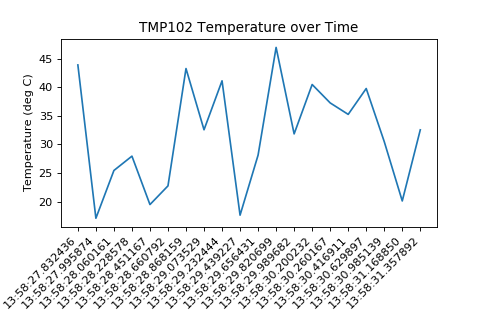

In [169]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

# Create figure for plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xs = []
ys = []


# This function is called periodically from FuncAnimation
def animate(i, xs, ys):

    # Read temperature (Celsius) from TMP102
    temp_c = np.random.normal(30,10)

    # Add x and y to lists
    xs.append(dt.datetime.now().strftime('%H:%M:%S.%f'))
    ys.append(temp_c)

    # Limit x and y lists to 20 items
    xs = xs[-20:]
    ys = ys[-20:]

    # Draw x and y lists
    ax.clear()
    ax.plot(xs, ys)

    # Format plot
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(bottom=0.30)
    plt.title('TMP102 Temperature over Time')
    plt.ylabel('Temperature (deg C)')

# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(xs, ys), interval=100)
plt.show()

<IPython.core.display.Javascript object>


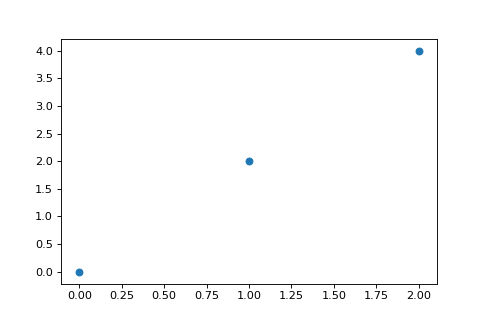

In [162]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
plt.ion()

x=[]
y=[]

for a in np.array(range(3)):

    time.sleep(1)
    x.append(a)
    y.append(2*a)

    ax1.clear()
    ax1.scatter(x,y, label="ok")


    fig.canvas.draw()
    

<IPython.core.display.Javascript object>


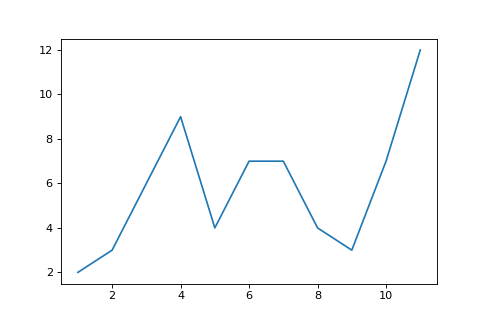

In [154]:
# Once launched, this plot will get updated as the file is modified (and saved)

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("sampleText.txt","r").read()
    dataArray = pullData.split('\n')
    xar = []
    yar = []

    for eachLine in dataArray:
        if len(eachLine)>1:
            x,y = eachLine.split(',')
            xar.append(int(x))
            yar.append(int(y))
    ax1.clear()
    ax1.plot(xar,yar)
    
    
ani = animation.FuncAnimation(fig, animate, interval=2000)
plt.show()

# Other

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
%run "../Functions/EDA_fct.py"
%run "../Functions/cleaning_fct.py"
%run "../Functions/ML_fct.py"

Using TensorFlow backend.


In [10]:
from nbconvert.exporters import HTMLExporter

html_exporter = HTMLExporter()

contents = html_exporter.from_filename("medium.ipynb")[0]

In [12]:
from pathlib import Path

Path("my_report.html").write_text(contents)

421026

In [13]:
from nbconvert.exporters import get_exporter

pdf_exporter = get_exporter("pdf")()

contents = pdf_exporter.from_filename("medium.ipynb")[0]

Path("my_report.pdf").write_text(contents)

OSError: xelatex not found on PATH, if you have not installed xelatex you may need to do so. Find further instructions at https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.

In [30]:
import subprocess

cp = subprocess.run(["ls"], stdout = -1)
print(cp.stdout.decode())

Case
cours
Data
DC_suivi_Py.ipynb
Iris.ipynb
Jupyter_commands.ipynb
medium.ipynb
model.pkl
mpg.ipynb
my_package
NN.ipynb
OOP
params.py
__pycache__
PySpark.ipynb
Python.ipynb
R.ipynb
sampleText.txt
Shell
test.html
Workshop



In [32]:
cp = subprocess.run(["python", "-m", "pip", "list"], stdout = -1)
print(cp.stdout.decode())

asn1crypto (0.24.0)
certifi (2018.11.29)
cffi (1.11.5)
chardet (3.0.4)
conda (4.6.7)
cryptography (2.5)
idna (2.6)
pip (9.0.3)
pycosat (0.6.3)
pycparser (2.18)
pyOpenSSL (17.5.0)
PySocks (1.6.8)
requests (2.18.4)
ruamel-yaml (0.15.35)
setuptools (39.0.1)
six (1.11.0)
urllib3 (1.22)
wheel (0.31.0)



In [40]:
import os
print(os.cpu_count())

40
